In [34]:
"""
@author: abhik
"""

#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_global = pd.read_csv('results_global.csv')
df_hyd = pd.read_csv('results_hyd_IN.csv')

In [36]:
df_global.isna().sum() #counting missing data 
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [37]:
df_global.isna().sum() #counting missing data 
df_hyd.head()
del df_hyd['city']
del df_hyd['country']
df_hyd.head()

,year,avg_temp
0,1796,26.53
1,1797,27.48
2,1798,26.20
3,1799,26.84
4,1800,26.88


In [38]:
df_hyd = df_hyd.interpolate(method='spline', order=2) #removal of NaNs
moving_avg_global = df_global.rolling(12).mean()
moving_avg_hyd = df_hyd.rolling(12).mean()

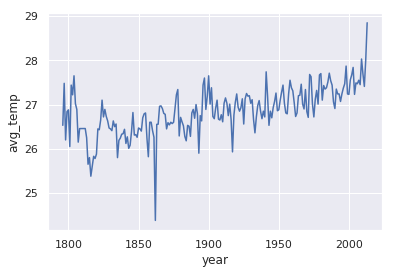

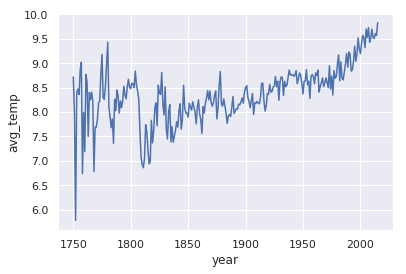

In [45]:
sns.set(style='darkgrid')
sns.lineplot(x='year', y='avg_temp', data=df_hyd, estimator='mean')
plt.show()
sns.lineplot(x='year', y='avg_temp', data=df_global)
plt.show()

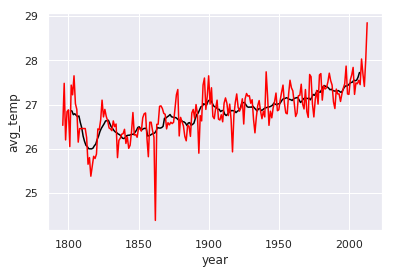

In [52]:

sns.set(style='darkgrid')
sns.lineplot(x='year', y='avg_temp', data=moving_avg_hyd, color = 'black')
sns.lineplot(x='year', y='avg_temp', data=df_hyd, color = 'red')
plt.show()

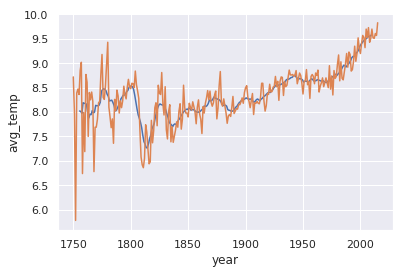

In [43]:

sns.set(style='darkgrid')
sns.lineplot(x='year', y='avg_temp', data=moving_avg_global)
sns.lineplot(x='year', y='avg_temp', data=df_global)
plt.show()

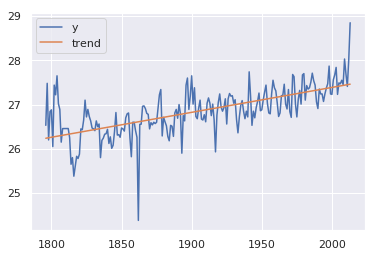

In [7]:
import statsmodels.formula.api as sm
result_hyd = sm.ols(formula="avg_temp ~ year", data=df_hyd).fit()
trend = result_hyd.predict(df_hyd.year)
data = pd.DataFrame(index=df_hyd.year.values, data={'y': df_hyd.avg_temp.values, 'trend': trend.values})
data.plot() 
plt.show()

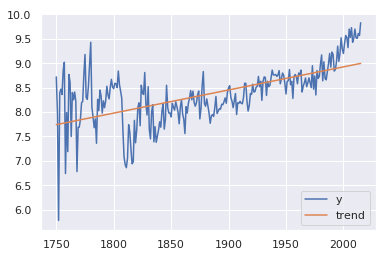

In [8]:
result_global = sm.ols(formula="avg_temp ~ year", data=df_global).fit()
trend = result_global.predict(df_global.year)
data = pd.DataFrame(index=df_global.year.values, data={'y': df_global.avg_temp.values, 'trend': trend.values})
data.plot() 
plt.show()

In [9]:
df_global = df_global.set_index('year')
df_hyd = df_hyd.set_index('year')

In [10]:
df_plot = pd.merge(df_hyd, df_global, on="year")
del df_plot['country']
del df_plot['city']

df_global.reset_index(drop=False, inplace=True)
df_hyd.reset_index(drop=False, inplace=True)


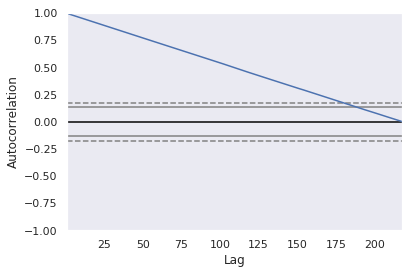

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_plot)
plt.show()

In [12]:
print(result_global.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_temp   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           5.74e-30
Time:                        20:07:57   Log-Likelihood:                -168.93
No. Observations:                 266   AIC:                             341.9
Df Residuals:                     264   BIC:                             349.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5416      0.690     -0.785      0.4

In [13]:
print(result_hyd.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_temp   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     167.7
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           9.23e-29
Time:                        20:07:57   Log-Likelihood:                -110.93
No. Observations:                 218   AIC:                             225.9
Df Residuals:                     216   BIC:                             232.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1177      0.829     19.437      0.0